Name of Student: - ANIRUDHA MULGUND
Roll no: - MM1921413
Reg. No: - 23-1486
Specialization: - BUSINESS ANALYTICS
Batch: - 2019-21
Institute: - BIMM
Semester: - III
Subject Name: - Retail Analytics
Assignment No: - 04
Submission Date: - 29-11-2020


### import relevent libraries

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Customer Loyality Program- Banks give us discount on purchase from websites like Myntra ans Amazon, Flipkart etc ...LO<- Wallet LO-> compares two or more cards and recommend best offer on one of the cards. 
It ensures the customer loyalty with the help of Score. Also called as Loyalty score/points.

In [2]:
#import data
data=pd.read_csv("train.csv")

In [3]:
data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
#Min and max value of target
data['target'].min(),data['target'].max()

(-33.21928095, 17.9650684)

#Define: understand the drivers of customer loyalty score
#Is it effective?
#Are customers loyal-  visualising the target
#Target= y variable

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   target              201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [6]:
data.describe()
#mean of target is negative

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [7]:
data.shape
#201917 total rows

(201917, 6)

In [8]:
# C =  Sources of data : Standard dataset provided by the academics (Secondary Data)
# Factor analysis is already done i.e after PCA. We will use the same
# O = checking null values and extracting useful columns.
# target = divide into 3 parts - Negative, Positive,Neutral

In [9]:
#Testing which criteria to use?

#target1 negative =less than -2
#Neutal = -2 to +2
#positive= greater than +2

#Target2 negative= less than 0
#Neutral= 0
#positive= greater than 0


In [10]:
#Creating the function
def check(x):
    if x<0:
        return 'Low'
    elif x==0:
        return 'med'
    else:
        return 'high'

In [11]:
#applying the created function on target column
data['target2'] = data['target'].apply(check)

In [12]:
data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,target2
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,Low
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,high
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,high
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,high
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,Low


In [13]:
#Creating the function for other criteria
def check2(x):
    if x<-2:
        return 'Low'
    elif x>2:
        return 'high'
    else:
        return 'med'

In [14]:
#Applying the equation on target column
data['target1'] = data['target'].apply(check2)

In [15]:
#Checking the value count
data['target2'].value_counts()

Low     102678
high     97609
med       1630
Name: target2, dtype: int64

In [16]:
#Checking the value count
data['target1'].value_counts()

med     163531
Low      20813
high     17573
Name: target1, dtype: int64

In [17]:
data['target2'].value_counts()/len(data)

Low     0.508516
high    0.483412
med     0.008073
Name: target2, dtype: float64

In [18]:
data['target1'].value_counts()/len(data)

med     0.809892
Low     0.103077
high    0.087031
Name: target1, dtype: float64

#retain target 1 (dist 2 wise), and drop target 2 looking for the distribution above
#to look at top *% who we call loyal (normal distribution)
#retain target 2, if we want to consider 2 similar size High and low and drop 0.8% mid

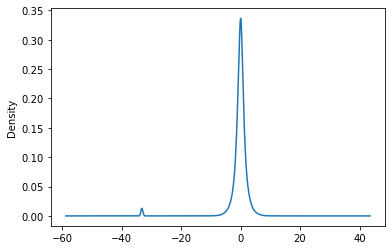

In [19]:
#Visualising target
s=pd.Series(data['target'])
ax=s.plot.kde()

In [20]:
# Checking outliers in the target variable and further plotting boxplot

In [21]:
#dropping the target 2 column
data.drop(['target2'], axis = 1,inplace=True)

In [22]:
data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,target1
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,med
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,med
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,med
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,med
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,med


In [23]:
data['card_id'].nunique()

201917

#all are unique values
#create target 1 numerical-we can run correlation
#check the first active month-can we do something with this data column
##### check for tenure/age of card in system (max -date of each card)
##### age_card, target1_num, feature_1, feature_2, feature_3
##### correlation

In [24]:
#data["target_num"] = np.where(data["target1"].str.contains("High"), 1, other=0)

In [25]:
def check3(x):
    if x=='high':
        return 3
    elif x=='med':
        return 2
    else:
        return 1

In [26]:
data["target_num"]= data['target1'].apply(check3)

In [27]:
data.sample(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,target1,target_num
32434,2017-04,C_ID_694baa4e3a,2,1,0,-3.339239,Low,1
199797,2017-11,C_ID_1b7b7b90a7,1,1,0,1.113707,med,2
80524,2016-03,C_ID_07cb89f2c2,2,2,0,2.880643,high,3
107107,2017-10,C_ID_bd1541fb54,4,3,0,-3.348062,Low,1
159699,2017-04,C_ID_c411a1b468,3,3,1,0.415038,med,2
121272,2017-07,C_ID_81139f4dca,3,1,1,2.237067,high,3
70178,2015-09,C_ID_24eada9638,1,2,0,2.850327,high,3
75057,2017-11,C_ID_888a52e6ba,3,3,1,-0.815899,med,2
96154,2017-10,C_ID_4ca83eabdf,2,3,0,0.102936,med,2
185855,2017-12,C_ID_7b18c60da7,3,2,1,-1.841380,med,2


In [28]:
data.dtypes

first_active_month     object
card_id                object
feature_1               int64
feature_2               int64
feature_3               int64
target                float64
target1                object
target_num              int64
dtype: object

In [29]:
#Changing the column datatype to datetime
data['first_active_month'] = pd.to_datetime(data['first_active_month'])

In [30]:
max_date=data['first_active_month'].max()

In [31]:
min_date=data['first_active_month'].min()
min_date

Timestamp('2011-11-01 00:00:00')

In [32]:
#Creating new column for age of the card
data['age_card']= max_date- data['first_active_month']

In [33]:
data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,target1,target_num,age_card
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,med,2,245 days
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,med,2,396 days
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,med,2,549 days
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,med,2,153 days
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,med,2,92 days


In [34]:
#data.loc[i,'age_card']=data.loc[1,'age_card'].days

In [36]:
#extracting only the numeric values
data['age_card'] = data['age_card'].apply(lambda x: x.days)

In [37]:
data.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,target1,target_num,age_card
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,med,2,245
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,med,2,396
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,med,2,549
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,med,2,153
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,med,2,92


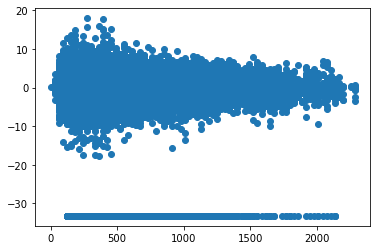

In [39]:

plt.scatter(data['age_card'], data['target'])
plt.show()
#We observe that lesser the age of Card, more is the loyalty score(target score)

In [40]:
#Creating a new data frame to check the correlation
df=data[["feature_1","feature_2","feature_3","target_num","age_card","target"]]

In [41]:
df.head()

,feature_1,feature_2,feature_3,target_num,age_card,target
0,5,2,1,2,245,-0.820283
1,4,1,0,2,396,0.392913
2,2,2,0,2,549,0.688056
3,4,3,0,2,153,0.142495
4,1,3,0,2,92,-0.159749


In [42]:
df.corr(method='pearson')
#coorelations of the features are very low with the target

,feature_1,feature_2,feature_3,target_num,age_card,target
feature_1,1.000000,-0.130969,0.583092,-0.009935,0.117144,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.001087,0.158150,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.005447,0.196046,-0.008125
target_num,-0.009935,-0.001087,-0.005447,1.000000,-0.015285,0.564624
age_card,0.117144,0.158150,0.196046,-0.015285,1.000000,-0.050453
target,-0.014251,-0.006242,-0.008125,0.564624,-0.050453,1.000000


In [44]:
#Positive target score %
d=data['target']>0
d.value_counts()/len(d)
#Only 48% have positive target score

False    0.516588
True     0.483412
Name: target, dtype: float64

In [45]:
import seaborn as sns

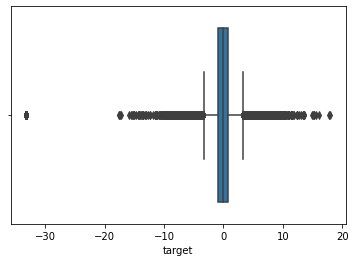

In [46]:
sns.boxplot(x='target',data=data)
#There are many outliers in the target

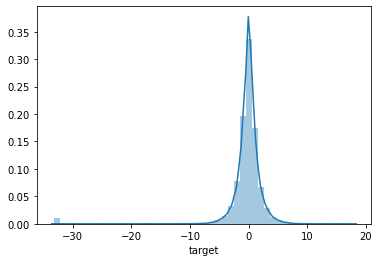

In [47]:
sns.distplot(data["target"])

In [48]:
from scipy import stats

In [49]:
data.shape

(201917, 9)

In [54]:
#Using z score, and keeping only the values with |z| <3, to remove the outliers
data3=data2[(np.abs(stats.zscore(data2['target']))<3)]
data3.shape

(194421, 9)

In [55]:
#repeat 3 times with various data names

In [56]:
#shape of data after z-score/normalizing


#data 201917,5
#data1 199645,5
#data2 196385,9
#data3 194421,9
#data4 193506
#stablised after data4

In [57]:
data3.corr()

,feature_1,feature_2,feature_3,target,target_num,age_card
feature_1,1.000000,-0.130466,0.584528,-0.012390,-0.007331,0.117154
feature_2,-0.130466,1.000000,0.059946,-0.006670,-0.001202,0.156689
feature_3,0.584528,0.059946,1.000000,-0.010610,-0.005458,0.194352
target,-0.012390,-0.006670,-0.010610,1.000000,0.796334,-0.003682
target_num,-0.007331,-0.001202,-0.005458,0.796334,1.000000,-0.001401
age_card,0.117154,0.156689,0.194352,-0.003682,-0.001401,1.000000


In [58]:
data.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,target1,target_num,age_card
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,med,2,245
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,med,2,396
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,med,2,549
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,med,2,153
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,med,2,92


In [59]:
#importing testing dataset
test=pd.read_csv("test.csv")

In [60]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [61]:
#EDA for test dataset
test.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [62]:
#dropping missing value row
test=test.dropna()

In [63]:
#creating age_card variable for test data

In [64]:
test['first_active_month'] = pd.to_datetime(test['first_active_month'])

In [65]:
max_date_test=test['first_active_month'].max()

In [66]:
test['age_card']= (max_date_test- test['first_active_month']).dt.days

In [67]:
X_test=test[['feature_1','feature_2','feature_3','age_card']]

In [68]:
#model creation using sklearn

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
#input variables
X=data3[['feature_1','feature_2','feature_3','age_card']]

In [71]:
#output variable
y=data3['target']

Perform the Regression

In [72]:
#training the model

In [73]:
lr=LinearRegression().fit(X,y)

In [74]:
#Checking the accuracy
lr.score(X,y)

0.0002312682014952161

In [75]:
#making predictions on test data
pred=list(lr.predict(X_test))

In [76]:
def check2(x):
    if x<-2:
        return 'Low'
    elif x>2:
        return 'high'
    else:
        return 'med'

In [77]:
Output=list(map(check2,pred))

In [78]:
test['target']=Output

In [79]:
test['target'].value_counts()

med    123622
Name: target, dtype: int64

In [80]:
#All the testing data set have medium customer loyalty

In [81]:
# As R squae value is coming zero. So, linear regreesion is not a good model for prediction. 
#WE should go for logistic regression.
#We have to check for r square value > 0.

In [83]:
# crete a list of our conditions
conditions= [
    (data3['target'] <= 0),
    (data3['target']> 0),
]

# create a list of the values we want to assign for each condition
values=[0,1]

#create a new column and use np.select to assign values to it using our list as arguments
data3['target2'] = np.select(conditions,values)

<ipython-input-83-ddf91fc5e6c8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['target2'] = np.select(conditions,values)


In [84]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [85]:
#input variables
X=data3[['feature_1','feature_2','feature_3','age_card']]

In [86]:
#output variable
y=data3['target2']

In [87]:
#training the model

In [88]:
lr=LogisticRegression().fit(X,y)

In [89]:
#Checking the accuracy
lr.score(X,y)             # 51% accuracy

0.5166622947109623

In [91]:
# iteratively we will check p value and ew will remove the variable havimg high p- value.
# Remove feature 3 and age_card
logit_model= sm.Logit(y,X)
result= logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692790
         Iterations 3
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: target2          AIC:              269393.6812
Date:               2020-11-28 14:52 BIC:              269434.3923
No. Observations:   194421           Log-Likelihood:   -1.3469e+05
Df Model:           3                LL-Null:          -1.3471e+05
Df Residuals:       194417           LLR p-value:      1.5423e-08 
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     3.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
feature_1      -0.0083    0.0034  -2.4697  0.0135  -0.0149  -0.0017
feature_2      -0.0096    0.0047  -2.0507  0.0403

In [92]:
X=data3[['feature_1','feature_2']]
Y=data3['target2']
logit_model= sm.Logit(Y,X)
result= logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692792
         Iterations 3
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: target2          AIC:              269390.8054
Date:               2020-11-28 14:52 BIC:              269411.1609
No. Observations:   194421           Log-Likelihood:   -1.3469e+05
Df Model:           1                LL-Null:          -1.3471e+05
Df Residuals:       194419           LLR p-value:      6.6596e-10 
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     3.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
feature_1      -0.0106    0.0025  -4.2010  0.0000  -0.0155  -0.0056
feature_2      -0.0107    0.0044  -2.4340  0.0149

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.510


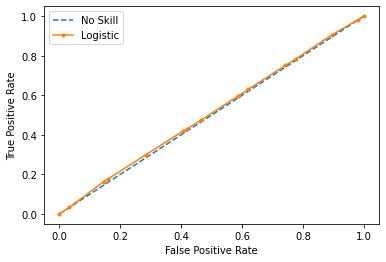

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X, Y)
# predict probabilities
lr_probs = model.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y, ns_probs)
lr_auc = roc_auc_score(Y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [94]:
# It doen't make much differnce..so we will check for ROC curve.
# As we can see that logistic is giving same as no- skill model.